In [1]:
"""
Reading and Understanding the Data
Training the model
Residual Analysis
Predicting and evaluating the model on the test set
"""

'\nReading and Understanding the Data\nTraining the model\nResidual Analysis\nPredicting and evaluating the model on the test set\n'

In [4]:
from google.colab import files

# Upload a file
uploaded = files.upload()

# Access the uploaded file
for filename in uploaded.keys():
    print('Uploaded file:', filename)

Saving archive (4).zip to archive (4) (2).zip
Uploaded file: archive (4).zip


In [6]:
# Read the extracted files
import numpy as np
import pandas as pd
import zipfile
zip_file_path = '/content/archive (4).zip'
# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/target_directory/')


In [7]:
# read the data
data = pd.read_csv('/content/target_directory/Salary_dataset.csv')
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [8]:
# drop the first column as it is redundant
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [9]:
# shape of the data
data.shape

(30, 2)

There are 30 rows and 2 columns present in the data.

In [10]:
# info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [11]:
# statistical summary of the dataset
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [12]:
# missing values in the data
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

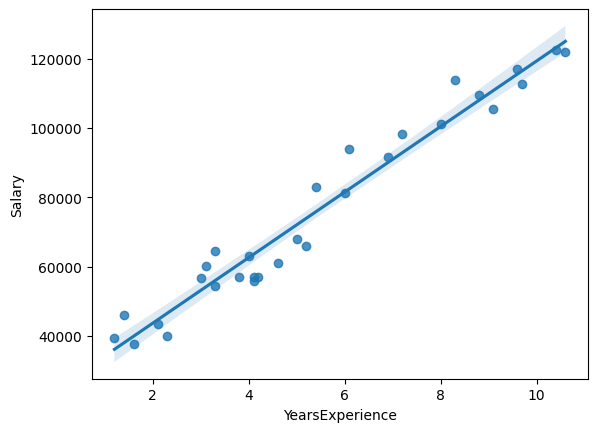

In [14]:
# Visualise the data using regression plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x = 'YearsExperience', y = 'Salary', data = data)
plt.show()

Step 2: Performing Simple Linear Regression
The equation of simple linear regression is:

y = mx + c

where,

y is the dependent (outcome or response) variable
m is the slope of the line
x is the independent (predictor) variable
c is the y-intercept of the line

Here, the independent variable is 'YearsExperience' and dependent variable is 'Salary'.

Steps of model building:
Create X and y
create train and test sets
Train the model on training set (i.e. learn the coefficients)
Evaluate the model on the test set

In [15]:
# create X and y
X = data['YearsExperience']
y = data['Salary']

In [16]:
X

0      1.2
1      1.4
2      1.6
3      2.1
4      2.3
5      3.0
6      3.1
7      3.3
8      3.3
9      3.8
10     4.0
11     4.1
12     4.1
13     4.2
14     4.6
15     5.0
16     5.2
17     5.4
18     6.0
19     6.1
20     6.9
21     7.2
22     8.0
23     8.3
24     8.8
25     9.1
26     9.6
27     9.7
28    10.4
29    10.6
Name: YearsExperience, dtype: float64

In [17]:
y

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
# create dataset
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24,) (6,) (24,) (6,)


In [22]:
import statsmodels.api as sm

# define the predictor variable X and the response variable y
X #= df['predictor']
y #= df['response']

# add a constant term to X
X = sm.add_constant(X)

# fit the linear regression model
model = sm.OLS(y, X).fit()

# print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        04:16:50   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.485e+04   2306.654     

In [23]:
X_train_sm = sm.tools.add_constant(X_train)
X_train_sm.head()


,const,YearsExperience
2,1.0,1.6
5,1.0,3.0
1,1.0,1.4
25,1.0,9.1
26,1.0,9.6


In [24]:
# fitting the model
lr_model = sm.OLS(y_train, X_train_sm).fit()   # This creates a Linear Regression Object and fits the model
lr_model.params


const              24386.706128
YearsExperience     9568.023484
dtype: float64

In [25]:
# summary of the model
print(lr_model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     580.0
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           2.66e-17
Time:                        04:19:27   Log-Likelihood:                -240.04
No. Observations:                  24   AIC:                             484.1
Df Residuals:                      22   BIC:                             486.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.439e+04   2434.594     

#make predictions on the training set

In [26]:
y_train_pred = lr_model.predict(X_train_sm)

In [27]:
y_train_pred

2      39695.543703
5      53090.776580
1      37781.939006
25    111455.719833
26    116239.731575
15     72226.823548
13     64572.404761
21     93276.475213
11     63615.602413
28    123894.150362
23    103801.301046
6      54047.578929
0      35868.334309
19     82751.649381
27    117196.533923
22    100930.894000
12     63615.602413
20     90406.068168
3      44479.555445
9      60745.195367
4      46393.160141
24    108585.312788
18     81794.847032
10     62658.800064
dtype: float64

#plot the model

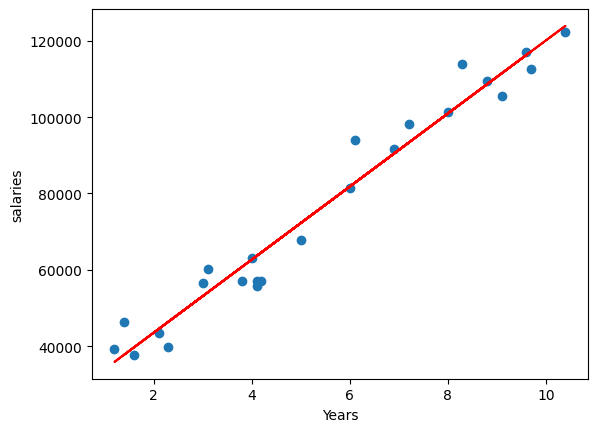

In [29]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, color = 'r')
plt.xlabel('Years')
plt.ylabel('salaries')
plt.show()

#Step 3: Residual Analysis

In [30]:
res = y_train - y_train_pred
res.head()

2    -1963.543703
5     3552.223420
1     8424.060994
25   -5872.719833
26     730.268425
dtype: float64

#plot the residuals

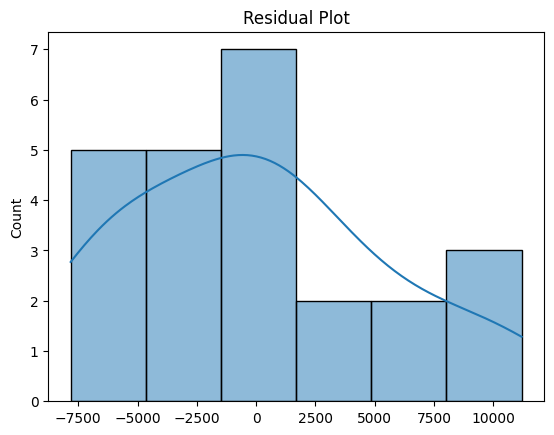

In [31]:
sns.histplot(res, kde=True)
plt.title('Residual Plot')
plt.show()

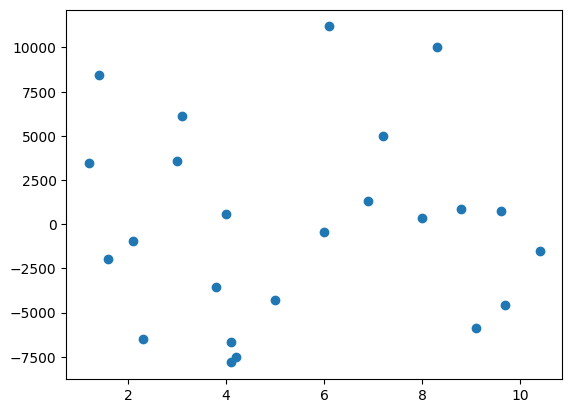

In [32]:
# look for patterns in residuals (we should not able to identify any patterns)
plt.scatter(X_train, res)
plt.show()

#Step 4: Predictions and Evaluation on the Test Set¶

In [33]:
# add a constant/intercept to the test set
X_test_sm = sm.add_constant(X_test)

# make prediction on test set
y_test_pred = lr_model.predict(X_test_sm)

In [35]:
# evaluate the model on the training and test set
from sklearn.metrics import r2_score
print('The R-squared for the training set is', round(r2_score(y_true = y_train, y_pred = y_train_pred), 2))
print('The R-squared for the test set is', round(r2_score(y_true = y_test, y_pred = y_test_pred), 2))

The R-squared for the training set is 0.96
The R-squared for the test set is 0.92


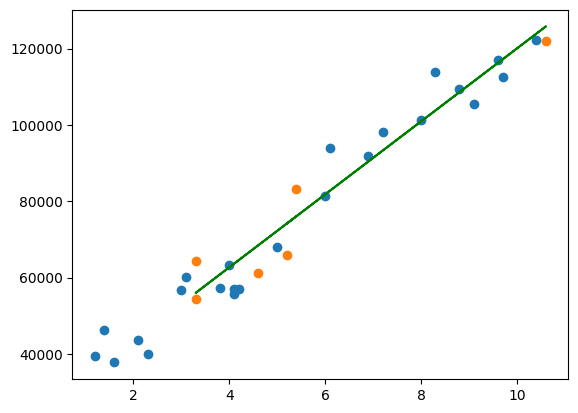

In [36]:
# plot the model with the test set
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, color = 'g')
plt.show()

#To save a model in Google Colab, you can use the pickle module. Here's an example:

You can then download the saved model file from the Files tab on the left side of the Colab notebook interface.

In [38]:
import pickle

# assuming you have a trained model named `model`
# save the model to a file named `my_model.pkl`
with open('my_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [42]:
#filename = '/content/my_model.pkl'
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))

# make predictions using the loaded model
#y_pred = loaded_model.predict(X_test,y_test)
#y_pred
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)